In [224]:
import numpy as np
import pandas as pd

data = pd.read_csv('C:/Users/admin/Desktop/PIATAK/Strojky/HW_3/data_git.csv', delimiter = ',')
print(data)

features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
X = data.loc[:, features].values
y = data.loc[:,['MDEV']].values


        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  MDEV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14

In [225]:
#nacitanie kniznic
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [226]:
#standardizovanie premennych
X = StandardScaler().fit_transform(X)
print(X)


[[-0.41771335  0.28482986 -1.2879095  ... -1.45900038  0.44105193
  -1.0755623 ]
 [-0.41526932 -0.48772236 -0.59338101 ... -0.30309415  0.44105193
  -0.49243937]
 [-0.41527165 -0.48772236 -0.59338101 ... -0.30309415  0.39642699
  -1.2087274 ]
 ...
 [-0.41137448 -0.48772236  0.11573841 ...  1.17646583  0.44105193
  -0.98304761]
 [-0.40568883 -0.48772236  0.11573841 ...  1.17646583  0.4032249
  -0.86530163]
 [-0.41292893 -0.48772236  0.11573841 ...  1.17646583  0.44105193
  -0.66905833]]


In [227]:
#PCA
pca = PCA(n_components=2) 
X_transformed = pca.fit_transform(X) #transformovania matica po PCA


In [228]:
#variancie hlavnych komponentov
expl_var_r = pca.explained_variance_ratio_
print("Explained variance ratios are: {}".format(expl_var_r)) #jednotlive variancie
print("Sum of the variance ratios is: {}".format(sum(expl_var_r))) #kumulativna variancia

Explained variance ratios are: [0.47097344 0.11015872]
Sum of the variance ratios is: 0.5811321617925713


In [229]:
#hlavne komponenty ako vektory
components = pca.components_
print("Values of components are: {}".format(components))

Values of components are: [[ 0.24959319 -0.25652131  0.3468611   0.005099    0.34297566 -0.18943673
   0.31385097 -0.32173451  0.31981744  0.33853899  0.20502118 -0.20273245
   0.30984085]
 [-0.3131865  -0.32130789  0.11181583  0.4567259   0.21985656  0.15387663
   0.3117475  -0.34918129 -0.27039719 -0.23886057 -0.30870356  0.23495727
  -0.07598227]]


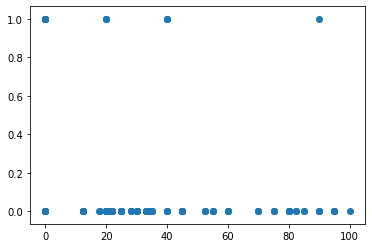

In [230]:
#vykreslenie povodnych dat - len dve premenne
plt.scatter(data.loc[:,['ZN']].values, data.loc[:,['CHAS']].values)
plt.show()

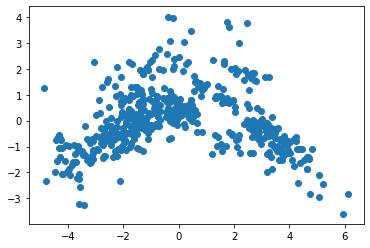

In [231]:
#vykreslenie transformovanych dat
plt.scatter(X_transformed[:, 0], X_transformed[:, 1])
plt.show()


In [236]:
# transformované data + target value
data_frame = pd.DataFrame(data = X_transformed[:,0:2]
             , columns = ['PC_1', 'PC_2'])
data_final = pd.concat([data_frame, data[['MDEV']]], axis = 1)

df_cheap = data_final['MDEV'] <= 15 #cheap houses
df_exp = data_final['MDEV'] >= 30 #expensive houses
df_zvysok = (data_final['MDEV'] > 15) & (data_final['MDEV'] < 30) #ostatne


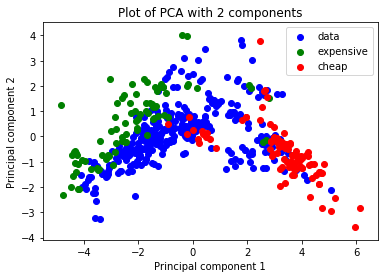

In [237]:
#vykreslenie transformovanych dat (=prvé dva hlavné komponenty) farebne
plt.scatter(data_final[df_zvysok][['PC_1']], data_final[df_zvysok][['PC_2']], c = 'b', label = 'data')
plt.scatter(data_final[df_exp][['PC_1']], data_final[df_exp][['PC_2']], c = 'g', label = 'expensive')
plt.scatter(data_final[df_cheap][['PC_1']], data_final[df_cheap][['PC_2']], c = 'r', label = 'cheap')

plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Plot of PCA with 2 components')
plt.legend(loc=1)

plt.show()